# Proposal to manager of LA Dodgers

#### David Pahmer

   Despite the excellence of the Dodgers as a team, you still want to do what can be done to increase game attendance in reasonable and feasible ways. By studying the attendance records of home games during this past season, I can make some suggestions that will tend to raise the attendance numbers per game.  
    Partly, the question is what will make the prospective spectators choose to come to the stadium, and what will make them choose to stay home?  
    Although a number of possibilities spring quickly to mind, we can check the data to see whether our instincts are on the ball.

Let's look at the data. We are working with a dataset that includes the attendance at all of the home games of the 2022 season, with some characteristics of each game and try to discern any patterns that might relate to attendance.  

Let's look at the data:

In [1]:
import pandas as pd, numpy as np
dg=pd.read_csv('dodgers-2022.csv')

In [2]:
dg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   month        81 non-null     object
 1   day          81 non-null     int64 
 2   attend       81 non-null     int64 
 3   day_of_week  81 non-null     object
 4   opponent     81 non-null     object
 5   temp         81 non-null     int64 
 6   skies        81 non-null     object
 7   day_night    81 non-null     object
 8   cap          81 non-null     object
 9   shirt        81 non-null     object
 10  fireworks    81 non-null     object
 11  bobblehead   81 non-null     object
dtypes: int64(3), object(9)
memory usage: 7.7+ KB


This tells us that we are given the day of the game (date and day of week), the time, the weather (temp and clouds), the team played, and the bonus treats- fireworks or giveaways.  
Here's a sample of how the data look:

In [3]:
dg.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


For our purposes, we will convert the bonus columns from YES/NO to 1 / 0 to make the analysis easier. 

In [4]:
dg=pd.concat([dg, pd.get_dummies(dg[['cap','shirt','fireworks','bobblehead']])], axis=1)
dg=dg.drop(columns=['cap','shirt','fireworks','bobblehead','cap_NO','shirt_NO',
                    'fireworks_NO','bobblehead_NO'])
dg.rename(columns={"cap_YES":"cap","shirt_YES":"shirt","fireworks_YES":"fireworks",
                   "bobblehead_YES":"bobblehead"}, inplace=True)

In [5]:
dg.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,0,0,0,0
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,0,0,0,0
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,0,0,0,0
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,0,0,1,0
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,0,0,0,0


At this point, let's see how the bonus treats affected attendance, using a biserial correlation:

In [6]:
# Using the scipy biserial correlation function
from scipy.stats import pointbiserialr

In [7]:
for col in ['cap','shirt','fireworks','bobblehead']:
    print(col,": " , "R (correlation):", round(pointbiserialr(dg[col],dg.attend).statistic,3),
          "p-value:", round(pointbiserialr(dg[col],dg.attend).pvalue,3))

cap :  R (correlation): -0.055 p-value: 0.626
shirt :  R (correlation): 0.133 p-value: 0.236
fireworks :  R (correlation): 0.002 p-value: 0.985
bobblehead :  R (correlation): 0.582 p-value: 0.0


Looking at the different correlation coefficients- the r values- we can see that cap distributions, shirt giveaways, and a fireworks show have practically no effect on game attendance. However, the bobblehead giveaway seems to have a statistically significant (p<.001) effect on attendance! Let's see if month or temperature correlates with attendance.  
First we'll convert the month names to their numerical equivalents.

In [8]:
mondict={"APR":4, "MAY":5, "JUN":6,"JUL":7,"AUG":8,"SEP":9,"OCT":10}
dg['month']=dg.month.replace(mondict)

In [9]:
dg[['month','temp','attend']].corr()


,month,temp,attend
month,1.000000,0.806647,0.049306
temp,0.806647,1.000000,0.098951
attend,0.049306,0.098951,1.000000


We see that month and even temperature seem to have no effect on attendance. (Granted, the temperature variation in LA is not great, but still we are examining the Dodgers specifically so that's all that matters.)

In [10]:
dg.month.value_counts()

5     18
8     15
4     12
7     12
9     12
6      9
10     3
Name: month, dtype: int64

So there were only three games in October, but the other months had a good number of games to look at.

At this point, it looks like the only thing that affects game attendance is giving out bobbleheads! Let's see this more vividly:

<Axes: title={'center': 'attend'}, xlabel='bobblehead'>

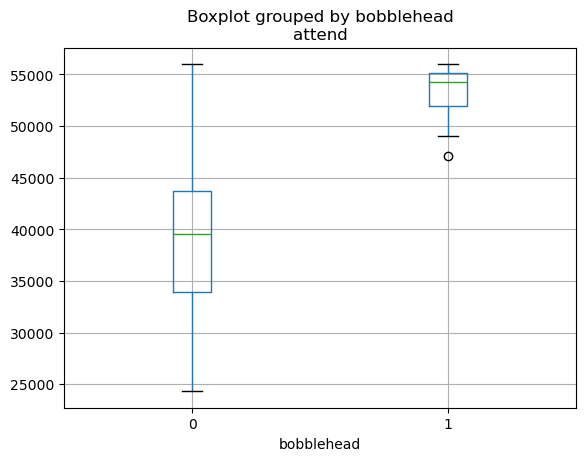

In [11]:
dg.boxplot('attend', by='bobblehead')

This shows that the attendance hovers below 40,000 for regular games, but for the games that give out bobbleheads to the attendees, the attendance tends to be 15,000 more. That's amazing.  
However, let's look at another important datapoint that we haven't looked at yet- the opponent playing. Maybe the attendance rises and drops depending on the opponent. So first let's see how many games are played against each team.

In [12]:
dg.opponent.value_counts()

Giants       9
Rockies      9
Snakes       9
Padres       9
Cardinals    7
Mets         4
Brewers      4
Pirates      3
Cubs         3
Phillies     3
Reds         3
Astros       3
White Sox    3
Angels       3
Nationals    3
Braves       3
Marlins      3
Name: opponent, dtype: int64

This suggests that we might not have enough data to understand the effects of the opponent for most of the opponents, but let's see if something emerges from a chart of the attendance broken down by team:

<Axes: title={'center': 'attend'}, xlabel='opponent'>

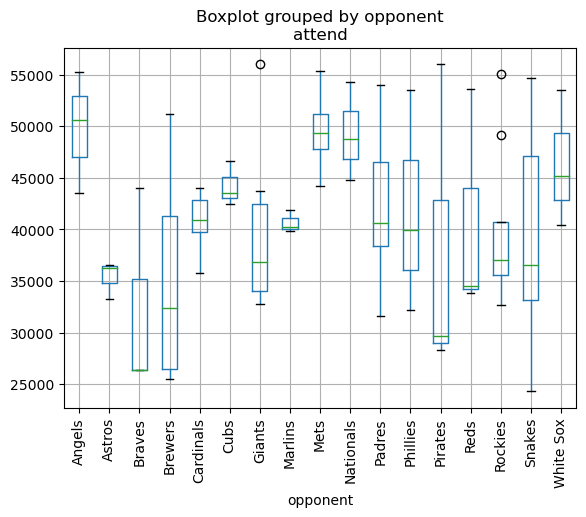

In [13]:
dg.boxplot('attend', by='opponent', rot=90)

So there is certainly a wide range of attendance rates that look like they depend on the opposing team, but notice the tall boxes and long whiskers- they imply that even within the same team the numbers are spread far apart. Furthermore, for the teams with short boxes and short whiskers, such as the Marlins, Astros and Cubs, there are only few games that are being used for analysis, which is likely too few to feel confident about the inferences. After all, maybe other factors are throwing off the attendance patterns.  
Let's look at the attendance by month:

<Axes: title={'center': 'attend'}, xlabel='month'>

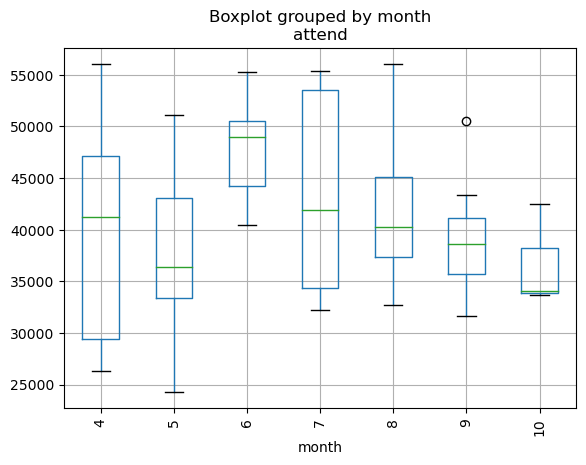

In [14]:
dg.boxplot('attend', by='month', rot=90)

This suggests that the attendance varies widely by month, so although attendance seems lower in October than June, but each month had low attendance also, with June's lowest being lower than October's highest. So perhaps we can do something to boost September and October's attendance.  
Just for completeness, let's see how the weather affected things:

<Axes: title={'center': 'attend'}, xlabel='skies'>

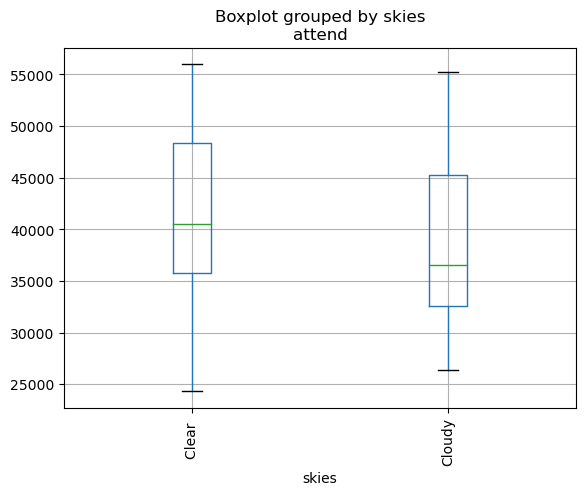

In [15]:
dg.boxplot('attend', by='skies', rot=90)

Clearly the weather had nothing to do with attendance. 

Getting back to the oppsing team and the effects of the bobblehead giveaway- let's see how the bobblehead giveaway affected the attendance by team:

<Axes: title={'center': 'attend'}, xlabel='[opponent, bobblehead]'>

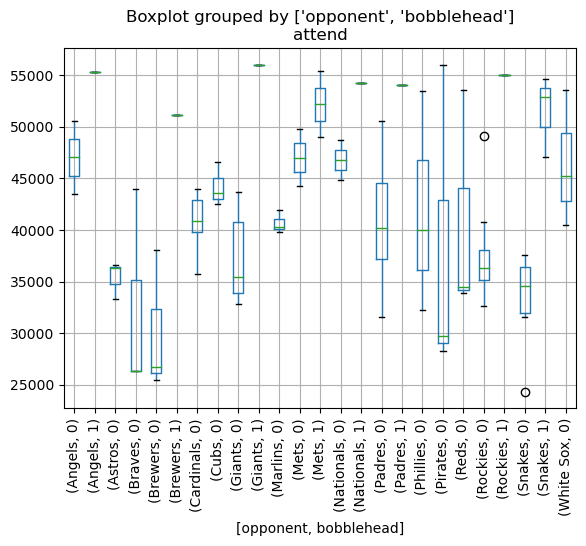

In [16]:
dg.boxplot('attend', by=['opponent','bobblehead'], rot=90)

Notice how the bobblehead days affected attendance for the same opponent: Angels, Brewers, Giants, Mets, Nationals, Padres, Rockies and Snakes had games with bobbleheads and also without. In all cases the attendance was tremendously increased! 

Perhaps the bobblehead giveaways were only effective at drawing attendance during some of the months, so let's examine the month by month effect of bobblehead giveaways: 

<Axes: title={'center': 'attend'}, xlabel='[month, bobblehead]'>

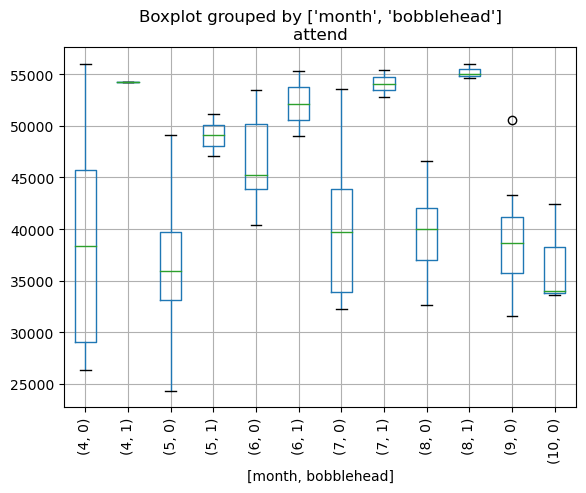

In [17]:
dg.boxplot('attend', by=['month','bobblehead'], rot=90)

This shows a few things clearly- the bobblehead giveaways didn't happen at all during September and October even though there were 15 games played during those months. Perhaps bobbleheads should be given away more frequently, but especially during September and October, where we can say with some confidence that attendance should jump significantly from that one initiative.

However, I see that you have already sent out your 2023 bobbehead days schedule and you seem to have reduced the number of those days. Perhaps that is an unwise move.